# Contexto
Se disponde de una muestra de la empresa "Big Carrier" con datos de ventas, información de pedidos, clientes, envíos, etc. Esta empresa tiene sede central en Canadá y se dedica a la comercialización, a nivel internacional, de medios de transportes de pequeño, mediano y gran porte.

El objetivo de este análisis es proporcionar estadísticas correspondientes al dataset recibido, así como identificar operaciones a optimizar que permitan ampliar su presencia a nivel global.Poder identificar características generales de los clientes, en relación a sus pedidos.

Estructura del dataset:
* ORDERNUMBER: número de pedido
* QUANTITYORDERED:cantidad pedida
* PRICEEACH: precio unitario en dólares
* ORDERLINENUMBER: número de línea del pedido
* SALES: monto total de la venta en en dólares
* ORDERDATE: fecha del pedido; formato mm/dd/yyyy h:mm
* STATUS: estado del pedido (Cancelled, Disputed, In Process, On Hold, Resolved, Shipped)
* QTR_ID: se desconoce la definición de este campo
* MONTH_ID: número de mes correspondiente a ORDERDATE
* YEAR_ID: año correspondiente a ORDERDATE
* PRODUCTLINE: categoría de producto
* MSRP: Manufacturer Suggested Retail Price (Precio de venta sugerido por el fabricante)
* PRODUCTCODE: código del producto
* CUSTOMERNAME: nombre del cliente
* PHONE: teléfono del cliente
* ADDRESSLINE1: dirección del cliente
* ADDRESSLINE2: otra dirección del cliente
* CITY: ciudad del cliente
* STATE: estado al cual corresponde la ciudad
* POSTALCODE: código postal
* COUNTRY: País
* TERRITORY: nombre del territorio al cual corresponde el país
* CONTACTLASTNAME: apellido del contacto del cliente
* CONTACTFIRSTNAME: nombre del contacto del cliente
* DEALSIZE: tamaño de la operación


**Fuente**: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download&select=sales_data_sample.csv

# DataSet

### 1. Carga de datos a dataframe desde archivo .csv

In [94]:
import pandas as pd

In [95]:
ventas = pd.read_excel('/content/drive/MyDrive/GS-Documentos/Cursos-/Data Science[UTN BA]/TP Integrador/sales_data_sample.xlsx');

### 2. Descripción general del dataframe

In [96]:
#Dimensión (cantidad filas/columnas)
ventas.shape

(2823, 25)

In [97]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [98]:
#Columnas del dataframe
ventas.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [99]:
#Tipo de dato de cada columna
ventas.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [100]:
#Periodo de ventas disponibles
periodo = ventas.groupby('YEAR_ID')['MONTH_ID'].agg(menor="min", mayor="max")
print(periodo)

         menor  mayor
YEAR_ID              
2003         1     12
2004         1     12
2005         1      5


In [101]:
#Visualización de las primeras 10 filas
ventas.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


### 3. Verificación y limpieza de datos

3.1.Verificación de datos nulos, inválidos y/o repetidos

In [102]:
#Cuenta de valores nulos por columna
ventas.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [103]:
ventas.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [104]:
#Registros duplicados
ventas.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [105]:
#Datos agrupados por nro de pedido y código de producto para detectar si el mismo código de producto aparece más de una vez en el mismo pedido
productos=ventas[['ORDERNUMBER','PRODUCTCODE']].sort_values('ORDERNUMBER')
productos.duplicated()

578     False
2024    False
680     False
1267    False
728     False
        ...  
2405    False
393     False
160     False
780     False
727     False
Length: 2823, dtype: bool

In [106]:
#Hace lo mismo que lo anterior (?)
ventas.duplicated(['ORDERNUMBER','PRODUCTCODE'])

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [107]:
#Precio unitario con valor menor a cero (dato inválido)
ventas.loc[ventas['PRICEEACH'] < 0]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [108]:
#Precio total con valor menor a cero (dato inválido)
ventas.loc[ventas['SALES'] < 0]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


De lo anterior surge que:
* Existen filas sin valor en algunas columnas de texto relacionadas con la dirección del cliente/contacto, como ADDRESSLINE2, STATE, POSTALCODE y TERRITORY.
* No hay registros duplicados, ni valores inválidos.

In [109]:
#Territorios a los cuales corresponden los países que aparecen en los pedidos
territorios=ventas['TERRITORY'].unique()
territorios

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [110]:
#Se verifican los retornos 'nan' a qué países corresponden
paises_sin_territorio = ventas.loc[ventas['TERRITORY'].isnull()]['COUNTRY'].value_counts()
print(paises_sin_territorio)

USA       1004
Canada      70
Name: COUNTRY, dtype: int64


De lo anterior surge que los pedidos que no tienen dato de Territorio corresponden a clientes de USA y Canadá. Significado de los demás nombres de territorio:
- EMEA= Europa, Medio Oriente y África
- APAC = Asia Pacífico

In [111]:
#Los territorios nulos se asignan entonces al valor 'NOAM' (Norteamérica)
ventas['TERRITORY'] = ventas['TERRITORY'].fillna('NOAM')
ventas['TERRITORY'].unique()

array(['NOAM', 'EMEA', 'APAC', 'Japan'], dtype=object)

3.2.Eliminación de filas y columnas

In [112]:
#Columnas: se eliminan las columnas correspondientes a fecha del pedido (se usará mes y año), columnas que representen identificadores
#y datos de contacto/dirección de clientes
ventas.drop(['ORDERNUMBER','ORDERLINENUMBER','ORDERDATE','QTR_ID','MSRP','PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME'], axis=1,inplace=True)
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   object 
 4   MONTH_ID         2823 non-null   int64  
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   PRODUCTCODE      2823 non-null   object 
 8   CUSTOMERNAME     2823 non-null   object 
 9   CITY             2823 non-null   object 
 10  COUNTRY          2823 non-null   object 
 11  TERRITORY        2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 286.8+ KB


In [113]:
#Filas: se eliminan filas correspondientes a YEAR_ID=2005, ya que solo hay datos hasta mayo 2005 (se analizarán solo ventas anuales completas)
#1. Cuenta de filas por año
ventas['YEAR_ID'].value_counts()  #2005 -> 478 filas


2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [114]:
#2. Eliminación de filas
ventas_final=ventas.drop(ventas[(ventas['YEAR_ID'] ==2005)].index)
ventas_final

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2871.00,Shipped,2,2003,Motorcycles,S10_1678,Land of Toys Inc.,NYC,USA,NOAM,Small
1,34,81.35,2765.90,Shipped,5,2003,Motorcycles,S10_1678,Reims Collectables,Reims,France,EMEA,Small
2,41,94.74,3884.34,Shipped,7,2003,Motorcycles,S10_1678,Lyon Souveniers,Paris,France,EMEA,Medium
3,45,83.26,3746.70,Shipped,8,2003,Motorcycles,S10_1678,Toys4GrownUps.com,Pasadena,USA,NOAM,Medium
4,49,100.00,5205.27,Shipped,10,2003,Motorcycles,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NOAM,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,35,59.51,2082.85,Shipped,10,2004,Ships,S72_3212,"AV Stores, Co.",Manchester,UK,EMEA,Small
2815,40,55.69,2227.60,Shipped,10,2004,Ships,S72_3212,La Rochelle Gifts,Nantes,France,EMEA,Small
2816,37,86.74,3209.38,Resolved,11,2004,Ships,S72_3212,Danish Wholesale Imports,Kobenhavn,Denmark,EMEA,Medium
2817,42,97.16,4080.72,Shipped,11,2004,Ships,S72_3212,Classic Legends Inc.,NYC,USA,NOAM,Medium


In [115]:
#3. Recuento: quedaron 2345 filas en total, correspondientes a los años 2003 y 2004
ventas_final['YEAR_ID'].value_counts()

2004    1345
2003    1000
Name: YEAR_ID, dtype: int64

3.3.Conversión de tipos de datos

In [116]:
# Convertir tipos de datos object a string
ventas_final['STATUS'] = ventas_final['STATUS'].astype("string")
ventas_final['YEAR_ID'] = ventas_final['YEAR_ID'].astype("string")
ventas_final['MONTH_ID'] = ventas_final['MONTH_ID'].astype("string")
ventas_final['PRODUCTLINE'] = ventas_final['PRODUCTLINE'].astype("string")
ventas_final['PRODUCTCODE'] = ventas_final['PRODUCTCODE'].astype("string")
ventas_final['CUSTOMERNAME'] = ventas_final['CUSTOMERNAME'].astype("string")
ventas_final['CITY'] = ventas_final['CITY'].astype("string")
ventas_final['COUNTRY'] = ventas_final['COUNTRY'].astype("string")
ventas_final['TERRITORY'] = ventas_final['TERRITORY'].astype("string")
ventas_final['DEALSIZE'] = ventas_final['DEALSIZE'].astype("string")
ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2818
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2345 non-null   int64  
 1   PRICEEACH        2345 non-null   float64
 2   SALES            2345 non-null   float64
 3   STATUS           2345 non-null   string 
 4   MONTH_ID         2345 non-null   string 
 5   YEAR_ID          2345 non-null   string 
 6   PRODUCTLINE      2345 non-null   string 
 7   PRODUCTCODE      2345 non-null   string 
 8   CUSTOMERNAME     2345 non-null   string 
 9   CITY             2345 non-null   string 
 10  COUNTRY          2345 non-null   string 
 11  TERRITORY        2345 non-null   string 
 12  DEALSIZE         2345 non-null   string 
dtypes: float64(2), int64(1), string(10)
memory usage: 256.5 KB


### 4. Exploración de datos

In [117]:
#Categorías de productos
categorias=ventas_final['PRODUCTLINE'].value_counts()
categorias

Classic Cars        808
Vintage Cars        505
Motorcycles         273
Trucks and Buses    252
Planes              246
Ships               196
Trains               65
Name: PRODUCTLINE, dtype: Int64

In [118]:
#Estado de las pedidos
estados= ventas_final['STATUS'].value_counts()
estados

Shipped      2263
Cancelled      60
Resolved       16
On Hold         6
Name: STATUS, dtype: Int64

In [119]:
#Volumen de las operaciones/pedidos
volumen= ventas_final['DEALSIZE'].value_counts()
volumen

Medium    1150
Small     1078
Large      117
Name: DEALSIZE, dtype: Int64

In [120]:
#Valores mínimos y máximos de los dealsize por categoría
df2 = ventas_final.groupby(['DEALSIZE','PRODUCTLINE'])['QUANTITYORDERED'].agg(menor="min", mayor="max")
df2

menor  mayor
DEALSIZE PRODUCTLINE                   
Large    Classic Cars         29     50
         Motorcycles          31     55
         Planes               39     50
         Trucks and Buses     38     50
         Vintage Cars         29     55
Medium   Classic Cars         20     55
         Motorcycles          20     55
         Planes               24     55
         Ships                20     55
         Trains               22     50
         Trucks and Buses     21     50
         Vintage Cars         20     50
Small    Classic Cars         20     50
         Motorcycles          20     48
         Planes               20     50
         Ships                20     50
         Trains               20     48
         Trucks and Buses     20     50
         Vintage Cars         20     50

In [121]:
#Países destinatarios de los pedidos
paises=ventas_final['COUNTRY'].value_counts()
paises

USA            841
Spain          253
France         250
Australia      142
UK             135
Italy           99
Norway          85
Singapore       76
Germany         62
Canada          61
Denmark         60
Finland         54
Sweden          49
Japan           42
Austria         38
Switzerland     31
Philippines     26
Belgium         25
Ireland         16
Name: COUNTRY, dtype: Int64

### 5. Resúmen de datos

In [122]:
ventas_final.describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,2345.000000,2345.000000,2345.000000
mean,34.727505,83.702021,3514.346328
std,9.028843,20.141470,1769.969374
min,20.000000,27.220000,577.600000
25%,27.000000,69.280000,2207.520000
50%,34.000000,95.800000,3167.360000
75%,43.000000,100.000000,4441.500000
max,55.000000,100.000000,12536.500000


Se tienen 2345 registros en el dataframe analizado, todos con valor en las columnas de cantidad, precio unitario y precio total.

Respecto a QUANTITYORDERED (cantidad pedida)

* La cantidad promedio pedida por producto, es de 34.73 unidades (mean).
* Según la desvación estándar, esa cantidad puede ser 34 +/- 9.028, aproximadamente.
* La menor cantidad pedida fue de 20 unidades (min) y la mayor de 55 unidades (max). Es decir, en todo registro, como mínimo se pidieron 20 unidades de un producto y como máximo 55.
* El 25% de los registros tiene 27 unidades pedidas o menos; el 75% cantidades superiores a ese valor.
* El 50% de los registros tiene 34 unidades pedidas o menos. Este valor coincide prácticamente con la media, con lo cual no se observan valores atípicos. El otro 50% incluye cantidades superiores.
* El 75% de los registros tiene 43 unidades pedidas o menos; el 25% cantidades superiores a ese valor.

Respecto a PRICEEACH (precio unitario)
* El precio promedio de los productos pedidos es de 83.70 dólares, aproximadamente (mean).
* Con una desvación estándar de 20.14, ese precio puede variar en promedio +/- 20.14 dólares.
* El producto más barato incluido en un pedido tiene un precio de 27.22 dólares (min), y el más caro de 100.00 (max).
* El 25% de los productos tiene un precio de 69.28 dólares o menos; el 75% tiene un precio superior.
* El 50% de los productos tiene un precio de 95.80 dólares o menos. **No coincide exactamente con la media (mean). El otro 50% tiene precios superiores.**
* El 75% de los productos tiene un precio de 100 dólares o menos. El 25% de 100.00; se interpreta 100.00 para el 25% restante porque ese es el valor máximo obtenido (no hay precio mayor a 100).



In [123]:
#Montos de ventas anuales por estado
ventas_estado=ventas_final.groupby(['YEAR_ID','STATUS'])['SALES'].sum().reset_index().sort_values(['STATUS','SALES'], ascending=True)
ventas_estado

,YEAR_ID,STATUS,SALES
0,2003,Cancelled,48710.92
3,2004,Cancelled,145776.56
4,2004,On Hold,26260.21
5,2004,Resolved,24078.61
1,2003,Resolved,28550.59
2,2003,Shipped,3439718.03
6,2004,Shipped,4528047.22


De lo anterior se observa: un incremento en pedidos/ventas cancelados,  triplicándose prácticamente el monto de un año al otro; un aumento en el monto de los pedidos enviados de un año al otro, y el resto de los estados en general se mantienen.

Debido a lo anterior, a continuación se observa puntualmente la distribución de categorías canceladas por año, para un mejor análisis.

In [124]:
#Cantidad de unidades canceladas por categoría/año
cancelados=ventas_final.loc[ventas_final['STATUS'] =='Cancelled']
pedidos_cancelados=cancelados.groupby(['YEAR_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(['PRODUCTLINE','QUANTITYORDERED'], ascending=True)
pedidos_cancelados

,YEAR_ID,PRODUCTLINE,QUANTITYORDERED
0,2003,Classic Cars,44
4,2004,Classic Cars,449
1,2003,Planes,104
5,2004,Planes,311
2,2003,Ships,287
6,2004,Ships,341
7,2004,Trains,42
3,2003,Vintage Cars,115
8,2004,Vintage Cars,345


De lo anterior se observa: todas las categorías han aumentado de un año al otro la cantidad de unidades canceladas, siendo el más significativo en la categoría "Classic Cars"; también aparece "Trains", que en el año anterior no había tenido cancelados.

En el análisis de montos/ventas realizado a continuación se descartan los "Cancelados" (status=Cancelled).


In [125]:
#Subconjunto pedidos no cancelados
ventas_no_cancel=ventas_final.loc[ventas_final['STATUS'] !='Cancelled']

In [126]:
#Montos de ventas por año
ventas_anio = ventas_no_cancel.groupby('YEAR_ID')['SALES'].sum().sort_values()
ventas_anio

YEAR_ID
2003    3468268.62
2004    4578386.04
Name: SALES, dtype: float64

In [127]:
#Montos de ventas por año, agrupados por categoría de producto
ventas_anio_categ = ventas_no_cancel.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].sum().sort_values()
ventas_anio_categ

YEAR_ID  PRODUCTLINE     
2003     Trains                72802.29
2004     Trains               111441.43
2003     Ships                220578.49
         Planes               263358.00
2004     Ships                309014.92
2003     Motorcycles          370895.58
         Trucks and Buses     420429.93
2004     Planes               476138.69
         Trucks and Buses     529302.89
         Motorcycles          560545.23
2003     Vintage Cars         641343.20
2004     Vintage Cars         883004.44
2003     Classic Cars        1478861.13
2004     Classic Cars        1708938.44
Name: SALES, dtype: float64

In [128]:
#Cantidad y monto total, agrupados por categoría de producto
cantidad_ventas_categ = ventas_no_cancel.groupby('PRODUCTLINE')['QUANTITYORDERED','SALES'].sum().sort_values('SALES', ascending=False)
cantidad_ventas_categ

<ipython-input-128-66d357a4bebf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cantidad_ventas_categ = ventas_no_cancel.groupby('PRODUCTLINE')['QUANTITYORDERED','SALES'].sum().sort_values('SALES', ascending=False)


,QUANTITYORDERED,SALES
PRODUCTLINE,,
Classic Cars,27398,3187799.57
Vintage Cars,16994,1524347.64
Trucks and Buses,9058,949732.82
Motorcycles,9429,931440.81
Planes,8105,739496.69
Ships,6153,529593.41
Trains,2261,184243.72


In [129]:
#Distribución de cantidades por país y categoria de producto
cantidad_categ_pais = ventas_no_cancel.groupby(['COUNTRY','PRODUCTLINE'])['QUANTITYORDERED'].sum()
cantidad_categ_pais

COUNTRY    PRODUCTLINE     
Australia  Classic Cars        1407
           Motorcycles          755
           Planes               662
           Ships                 24
           Trains                33
                               ... 
USA        Planes              2884
           Ships               1593
           Trains               693
           Trucks and Buses    3501
           Vintage Cars        6276
Name: QUANTITYORDERED, Length: 110, dtype: int64

In [130]:
#Distribución de cantidades por territorio y categoria de producto
cantidad_categ_territorio = ventas_no_cancel.groupby(['TERRITORY','PRODUCTLINE'])['QUANTITYORDERED'].sum()
cantidad_categ_territorio

TERRITORY  PRODUCTLINE     
APAC       Classic Cars         1915
           Motorcycles           755
           Planes                662
           Ships                  24
           Trains                 33
           Trucks and Buses      892
           Vintage Cars         1634
EMEA       Classic Cars        14322
           Motorcycles          3571
           Planes               3480
           Ships                3749
           Trains               1361
           Trucks and Buses     3797
           Vintage Cars         8205
Japan      Classic Cars         1205
           Motorcycles           550
           Planes                762
           Ships                 301
           Trains                174
           Trucks and Buses      517
           Vintage Cars          438
NOAM       Classic Cars         9956
           Motorcycles          4553
           Planes               3201
           Ships                2079
           Trains                693
          

In [131]:
#Top 5 clientes operaciones de mayor monto
top_clientes = ventas_no_cancel.groupby(['CUSTOMERNAME','COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_clientes.head(5)

CUSTOMERNAME                  COUNTRY  
Euro Shopping Channel         Spain        535485.29
Mini Gifts Distributors Ltd.  USA          441602.38
Australian Collectors, Co.    Australia    200995.41
Muscle Machine Inc            USA          197736.94
Dragon Souveniers, Ltd.       Singapore    168814.08
Name: SALES, dtype: float64

### 6. Visualización gráfica de los datos

In [132]:
import matplotlib.pyplot as plt

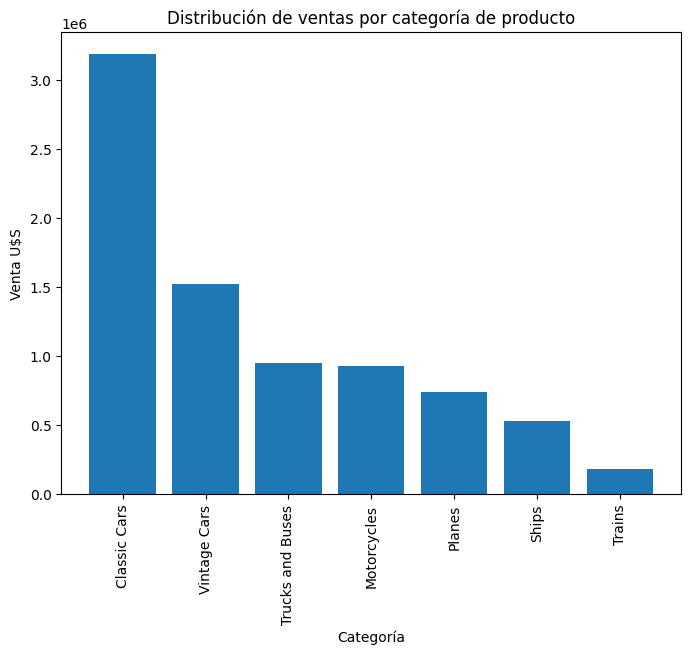

In [133]:
#Gráfico de barras: Venta total, agrupado por categoría de producto
ventas_categ = ventas_no_cancel.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
ventas_categ
plt.figure(figsize=(8, 6))
plt.bar(ventas_categ.index, ventas_categ.values)
plt.xlabel('Categoría')
plt.ylabel('Venta U$S')
plt.title('Distribución de ventas por categoría de producto')
plt.xticks(rotation=90)
plt.show()

La categoría que más se vende es "Classic Cars".

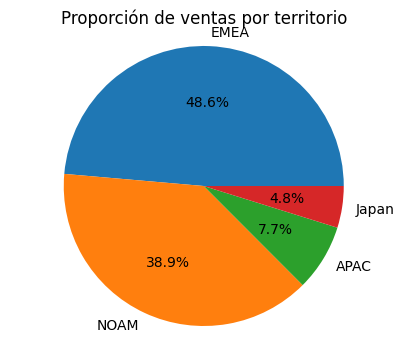

In [134]:
# Gráfico circular: Proporción de ventas por territorio
territorio_proporcion = ventas_no_cancel['TERRITORY'].value_counts() / len(ventas_no_cancel) * 100
plt.figure(figsize=(5, 4))
plt.pie(territorio_proporcion.values, labels=territorio_proporcion.index, autopct='%1.1f%%')
plt.title('Proporción de ventas por territorio')
plt.axis('equal')
plt.show()

En el territorio EMEA (Europa, Medio Oriente y África) es donde se registran las mayores ventas, seguido de NOAM (Norteamérica).

In [135]:
ventas_no_cancel['MONTH_ID']= pd.to_numeric(ventas_no_cancel['MONTH_ID'])

<ipython-input-135-3b24bed64447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_no_cancel['MONTH_ID']= pd.to_numeric(ventas_no_cancel['MONTH_ID'])


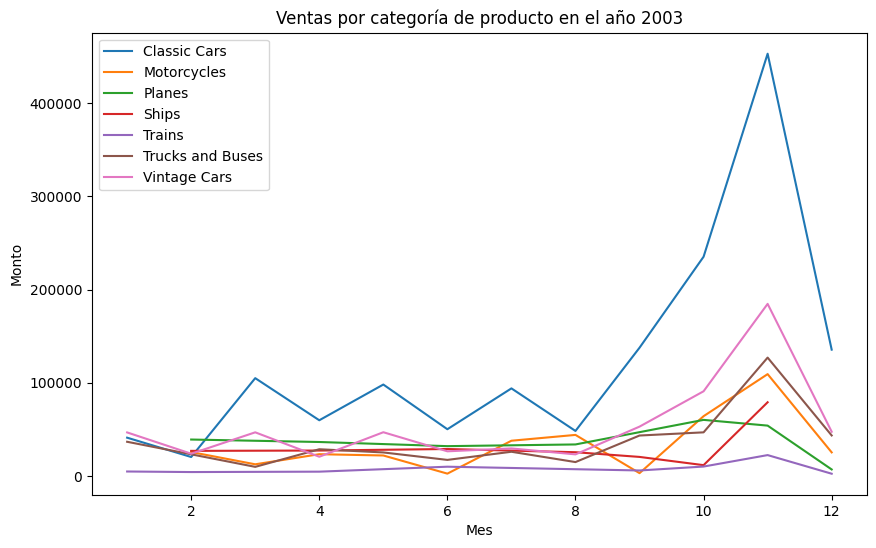

In [136]:
#Gráfico de líneas: ventas por categoría de producto en cada mes año 2003
ventas_2003= ventas_no_cancel.loc[ventas_no_cancel['YEAR_ID'] =='2003'].groupby(['PRODUCTLINE','MONTH_ID'])['SALES'].sum().reset_index().sort_values('MONTH_ID', ascending=True)

#Gráfico de líneas para cada categoría
plt.figure(figsize=(10,6))
for category, data in ventas_2003.groupby('PRODUCTLINE'):
    plt.plot(data['MONTH_ID'], data['SALES'], label=category)

plt.xlabel('Mes')
plt.ylabel('Monto')
plt.title('Ventas por categoría de producto en el año 2003')
plt.legend()
plt.show()

En el último cuatrimestre del año se observa un incremento en las ventas de las categorías Classic cars, Vintage cars, Truck and buses, Motorcycles y Ships, destacándose Classic cars. Para la categoría Planes, los montos van en descenso hacia el final del año; en tanto que la categoría Trains en general se mantiene. En todos los casos, los montos disminuyen a partir del mes 11.

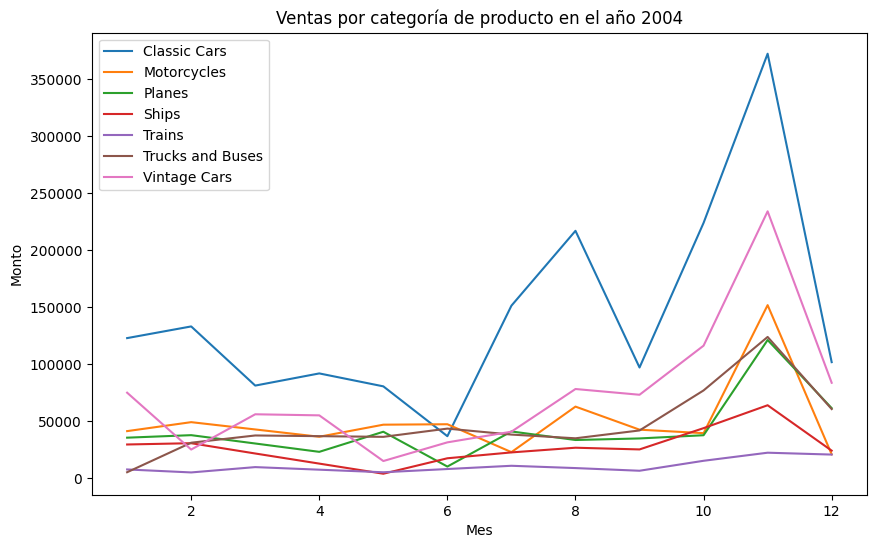

In [137]:
#Gráfico de líneas: ventas por categoría de producto en cada mes año 2004
ventas_2004= ventas_no_cancel.loc[ventas_no_cancel['YEAR_ID'] =='2004'].groupby(['PRODUCTLINE','MONTH_ID'])['SALES'].sum().reset_index().sort_values('MONTH_ID', ascending=True)

#Gráfico de líneas para cada categoría
plt.figure(figsize=(10,6))
for category, data in ventas_2004.groupby('PRODUCTLINE'):
    plt.plot(data['MONTH_ID'], data['SALES'], label=category)

plt.xlabel('Mes')
plt.ylabel('Monto')
plt.title('Ventas por categoría de producto en el año 2004')
plt.legend()
plt.show()

En el último cuatrimestre del año se observa un incremento en las ventas de las categorías Classic cars, Vintage cars, Motorcycles, Truck and buses, Planes y Ships, destacándose Classic cars como en el año anterior. La categoría Trains en general se mantiene.En todos los casos, los montos disminuyen a partir del mes 11.

### 7. Modelado
Clusterización con el objetivo de identificar diferentes segmentos de clientes con características similares.

In [138]:
####K-MEANS
!pip install kmodes
import kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

import numpy as np

In [139]:
# Seleccionar las características numéricas para el clustering
num_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# Seleccionar las características categóricas para el clustering
cat_features = ['STATUS', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'TERRITORY', 'DEALSIZE', 'COUNTRY']

In [140]:
# Convertir las características categóricas a representación numérica utilizando LabelEncoder
label_encoder = LabelEncoder()
for feature in cat_features:
    ventas_final[feature] = label_encoder.fit_transform(ventas_final[feature])

In [141]:
# Convertir los valores de las características numéricas a matrices numpy
X_num = ventas_final[num_features].values
X_num

array([[  30.  ,   95.7 , 2871.  ],
       [  34.  ,   81.35, 2765.9 ],
       [  41.  ,   94.74, 3884.34],
       ...,
       [  37.  ,   86.74, 3209.38],
       [  42.  ,   97.16, 4080.72],
       [  20.  ,  100.  , 2244.4 ]])

In [142]:
X_num

array([[  30.  ,   95.7 , 2871.  ],
       [  34.  ,   81.35, 2765.9 ],
       [  41.  ,   94.74, 3884.34],
       ...,
       [  37.  ,   86.74, 3209.38],
       [  42.  ,   97.16, 4080.72],
       [  20.  ,  100.  , 2244.4 ]])

In [143]:
# Convertir los valores de las características categóricas a matrices numpy
X_cat = ventas_final[cat_features].values
X_cat

array([[ 3,  4,  0, ...,  3,  2, 18],
       [ 3,  7,  0, ...,  1,  2,  6],
       [ 3,  9,  0, ...,  1,  1,  6],
       ...,
       [ 2,  2,  1, ...,  1,  1,  4],
       [ 3,  2,  1, ...,  3,  1, 18],
       [ 3,  3,  1, ...,  1,  2, 14]])

In [144]:
print(X_cat)

[[ 3  4  0 ...  3  2 18]
 [ 3  7  0 ...  1  2  6]
 [ 3  9  0 ...  1  1  6]
 ...
 [ 2  2  1 ...  1  1  4]
 [ 3  2  1 ...  3  1 18]
 [ 3  3  1 ...  1  2 14]]


In [145]:
# Combinar las matrices numéricas y categóricas en una sola matriz
X = np.concatenate((X_num, X_cat), axis=1)

In [146]:
print(X)

[[3.00000e+01 9.57000e+01 2.87100e+03 ... 3.00000e+00 2.00000e+00
  1.80000e+01]
 [3.40000e+01 8.13500e+01 2.76590e+03 ... 1.00000e+00 2.00000e+00
  6.00000e+00]
 [4.10000e+01 9.47400e+01 3.88434e+03 ... 1.00000e+00 1.00000e+00
  6.00000e+00]
 ...
 [3.70000e+01 8.67400e+01 3.20938e+03 ... 1.00000e+00 1.00000e+00
  4.00000e+00]
 [4.20000e+01 9.71600e+01 4.08072e+03 ... 3.00000e+00 1.00000e+00
  1.80000e+01]
 [2.00000e+01 1.00000e+02 2.24440e+03 ... 1.00000e+00 2.00000e+00
  1.40000e+01]]


In [147]:
# Definir el número de clusters que deseas crear
num_clusters = 4

In [148]:
# Crear el modelo K-Prototypes y realizar la clusterización
kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=list(range(len(num_features), X.shape[1])))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 358, ncost: 862888760.9320421
Run: 1, iteration: 2/100, moves: 194, ncost: 813251172.6500156
Run: 1, iteration: 3/100, moves: 106, ncost: 797250332.6391414
Run: 1, iteration: 4/100, moves: 85, ncost: 786944493.7286059
Run: 1, iteration: 5/100, moves: 76, ncost: 779583374.6514899
Run: 1, iteration: 6/100, moves: 28, ncost: 778316840.0823642
Run: 1, iteration: 7/100, moves: 16, ncost: 777842926.2939813
Run: 1, iteration: 8/100, moves: 22, ncost: 777106433.7789692
Run: 1, iteration: 9/100, moves: 26, ncost: 775992255.7226464
Run: 1, iteration: 10/100, moves: 14, ncost: 775757375.3146294
Run: 1, iteration: 11/100, moves: 5, ncost: 775732368.1432159
Run: 1, iteration: 12/100, moves: 2, ncost: 775724083.3777028
Run: 1, iteration: 13/100, moves: 1, ncost: 775721239.6260905
Run: 1, iteration: 14/100, moves: 

In [149]:
# Agregar los resultados de la clusterización al DataFrame original
ventas_final['CLUSTER'] = clusters

In [151]:
# Mostrar los resultados
print(ventas_final[['COUNTRY', 'CLUSTER']])

      COUNTRY  CLUSTER
0          18        0
1           6        0
2           6        0
3          18        0
4          18        1
...       ...      ...
2814       17        3
2815        6        3
2816        4        0
2817       18        0
2818       14        3

[2345 rows x 2 columns]


In [152]:
print(ventas_final[['TERRITORY', 'CLUSTER']])

      TERRITORY  CLUSTER
0             3        0
1             1        0
2             1        0
3             3        0
4             3        1
...         ...      ...
2814          1        3
2815          1        3
2816          1        0
2817          3        0
2818          1        3

[2345 rows x 2 columns]


In [154]:
# Mostrar las características promedio de cada cluster
cluster_means = ventas_final.groupby('CLUSTER').mean()
print(cluster_means)

         QUANTITYORDERED   PRICEEACH        SALES    STATUS  MONTH_ID  \
CLUSTER                                                                 
0              34.648428   89.584342  3328.774959  2.885914  4.584400   
1              39.719745   99.503439  5095.476921  2.936306  4.583864   
2              43.772021  100.000000  7531.585959  2.937824  4.740933   
3              29.826034   64.674173  1859.073881  2.917275  4.672749   

          YEAR_ID  PRODUCTLINE  PRODUCTCODE  CUSTOMERNAME       CITY  \
CLUSTER                                                                
0        0.582072     2.516880    56.357392     46.232829  37.096624   
1        0.554140     2.197452    41.216561     46.454352  37.424628   
2        0.606218     1.518135    26.979275     44.849741  38.621762   
3        0.568127     2.935523    64.439173     44.194647  37.457421   

           COUNTRY  TERRITORY  DEALSIZE  
CLUSTER                                  
0        12.288708   1.748545  1.298021  
1 

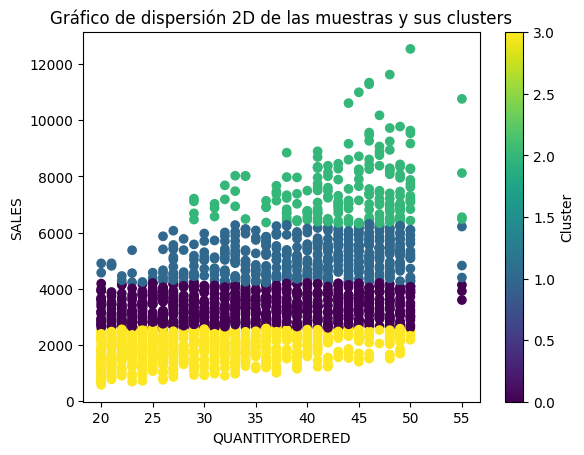

In [155]:
# Gráfico de dispersión
feature1 = 'QUANTITYORDERED'
feature2 = 'SALES' #'PRICEEACH'

# Creación del gráfico de dispersión
plt.scatter(ventas_final[feature1], ventas_final[feature2], c=ventas_final['CLUSTER'], cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Gráfico de dispersión 2D de las muestras y sus clusters')
plt.colorbar(label='Cluster')
plt.show()